[[0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 0.]]
[[0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 0.]]


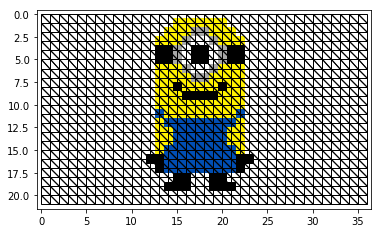

In [385]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

import matplotlib.image as mpimg
original_img  = Image.open(r'./minion/minion.png')
zoom = 1
original_img = original_img .convert('RGB')
original_img = original_img.resize((np.array(original_img .size)*zoom).astype(int))
h,w = original_img.size

img = np.array(original_img)
fig, ax = plt.subplots(1,1)
plt.imshow(img)
mesh_tri = []
points = []
points_dic = {}
index = 0
for i in range(0,h-1,zoom):
    for j in range(0,w-1,zoom):
        # print(i,j)
        # plt.plot(i,j)

        if i+1<h and j+1<w:
            # mesh_tri.append
            points.append([j,i])  # [x,y]
            r,g,b= img[int(j),int(i),:]
            points_dic[index] = [j,i,r,g,b]
            index += 1
            mesh_tri.append(Polygon([(i, j), (i + zoom, j), (i + zoom, j + zoom)]))
            mesh_tri.append(Polygon([(i, j), (i, j + zoom), (i + zoom, j + zoom)]))
        # img[i,j,:] = 0

# a = ax.add_patch(mesh)
# a.set_fill(False)
print(mesh_tri[0].get_xy())
print(mesh_tri[1].get_xy())
for tri in mesh_tri:
    a = ax.add_patch(tri)
    a.set_fill(False)
# ax = plt.gca()
# ax.set_aspect(1)
# plt.ylim(0,w)
# plt.xlim(0,h)
plt.show()
# plt.imshow(img)

In [386]:
points_dic

{0: [0, 0, 255, 255, 255],
 1: [1, 0, 255, 255, 255],
 2: [2, 0, 255, 255, 255],
 3: [3, 0, 255, 255, 255],
 4: [4, 0, 255, 255, 255],
 5: [5, 0, 255, 255, 255],
 6: [6, 0, 255, 255, 255],
 7: [7, 0, 255, 255, 255],
 8: [8, 0, 255, 255, 255],
 9: [9, 0, 255, 255, 255],
 10: [10, 0, 255, 255, 255],
 11: [11, 0, 255, 255, 255],
 12: [12, 0, 255, 255, 255],
 13: [13, 0, 255, 255, 255],
 14: [14, 0, 255, 255, 255],
 15: [15, 0, 255, 255, 255],
 16: [16, 0, 255, 255, 255],
 17: [17, 0, 255, 255, 255],
 18: [18, 0, 255, 255, 255],
 19: [19, 0, 255, 255, 255],
 20: [20, 0, 255, 255, 255],
 21: [0, 1, 255, 255, 255],
 22: [1, 1, 255, 255, 255],
 23: [2, 1, 255, 255, 255],
 24: [3, 1, 255, 255, 255],
 25: [4, 1, 255, 255, 255],
 26: [5, 1, 255, 255, 255],
 27: [6, 1, 255, 255, 255],
 28: [7, 1, 255, 255, 255],
 29: [8, 1, 255, 255, 255],
 30: [9, 1, 255, 255, 255],
 31: [10, 1, 255, 255, 255],
 32: [11, 1, 255, 255, 255],
 33: [12, 1, 255, 255, 255],
 34: [13, 1, 255, 255, 255],
 35: [14, 1, 25

In [399]:
def get_key (dict, value):
    for k, v in dict.items():
        # print((v==value))
        if (v[:2]==value).sum()==2:
            return k

In [496]:
mesh = []
mesh_dic = {}
for tri in mesh_tri:
    ver = tri.get_xy()
    # print(ver)
    p = []
    for i,v in enumerate(ver):
        if i == 3:
            break
        # index =
        y,x = v
        # print(x,y)
        r,g,b= img[int(x),int(y),:]
        r -=127.5
        g -= 127.5
        b -=127.5
        r /=127.5
        g /=127.5
        b /=127.5
        p.append([x,y,r,g,b])
        # if [x,y] == points_dic[0]:
        # print(index)
        mesh_dic[index] = p
    # print(p,q,r)
    mesh.append(p)

In [497]:
mesh = np.array(mesh)

In [498]:
mesh_dic

{1511: [[20.0, 35.0, 1.0, 1.0, 1.0],
  [21.0, 35.0, 1.0, 1.0, 1.0],
  [21.0, 36.0, 1.0, 1.0, 1.0]]}

In [499]:
mesh[1]

array([[0., 0., 1., 1., 1.],
       [1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [500]:
mesh[2]

array([[1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [2., 1., 1., 1., 1.]])

In [501]:
faces = (((mesh - [5,5,-1,-1,-1,])==0).sum(-1)==2).sum(-1)
faces_index = np.where(faces == 1)

In [502]:
As, bs, cs= {},{},{}

In [503]:
import math
# init A b c for all points
for i,point in enumerate(points):
    x,y = point
    # if i == 20:
    #     break
    faces = (((mesh - [x,y,-1,-1,-1,])==0).sum(-1)==2).sum(-1)
    faces_index = np.where(faces == 1)[0]
    A,b,c = np.zeros([5,5]),np.zeros([5,1]),0
    for index in faces_index:
        face = mesh[index]
        p,q,r = face
        p.shape,q.shape,r.shape = (1,5),(1,5),(1,5)
        p = np.transpose(p)
        q = np.transpose(q)
        r = np.transpose(r)
        e1 = (q-p)/np.linalg.norm(q-p)
        e2 = (r-p- ((e1*(r-p)).sum())*e1)/np.linalg.norm(r-p- ((e1*(r-p)).sum())*e1)
        A += np.identity(5) - e1.dot(np.transpose(e2)) - e2.dot(np.transpose(e2))
        b += (p*e1).sum()*(e1) + (p*e2).sum()*(e2) - p
    As[i] = A
    bs[i] = b
    cs[i] = c

In [504]:
t = np.array([1,2,3])
t.shape=(1,3)
np.transpose(t)

array([[1],
       [2],
       [3]])

In [505]:
edges = []
for tri in mesh_tri:
    ver = tri.get_xy()
    for i,v in enumerate(ver):
        if i == 3:
            break
        edges.append([ver[i],ver[i+1]])
edges = np.array(edges)
edges = np.unique(edges,axis= 0)
edges.shape

(2325, 2, 2)

In [506]:
def calculate_D(v,A,b,c):
    v = np.array(v)
    v.shape = (1,5)
    v = np.transpose(v)
    print(v)
    print(A)
    print(b)
    print(c)
    print(np.transpose(v).dot(A).dot(v))
    print(np.transpose(b).dot(v))
    return np.transpose(v).dot(A).dot(v) + 2 * np.transpose(b).dot(v) + c

In [507]:
for edge in edges:
    v1,v2 = edge
    v1_index = get_key(points_dic,v1)
    v2_index = get_key(points_dic,v2)
    A = As[v1_index] + As[v2_index]
    b = bs[v1_index] + bs[v2_index]
    c = cs[v1_index] + cs[v2_index]
    # try:
    #     Q = -np.transpose(b).dot(np.linalg.inv(A)).dot(b) + c
    # except:
    #     mid = (points_dic[v1_index]+points_dic[v2_index])/2
    #     D1 = np.transpose(points_dic[v1_index]) * A * points_dic[v1_index] + 2 * np.transpose(b) * points_dic[v1_index] + c
    #     D2 = np.transpose(points_dic[v2_index]) * A * points_dic[v2_index] + 2 * np.transpose(b) * points_dic[v2_index] + c
    #     D3 = np.transpose(points_dic[mid]) * A * points_dic[mid] + 2 * np.transpose(b) * points_dic[mid] + c
    #
    mid = np.array(points_dic[2]) + np.array(points_dic[3])/2
    D1 = calculate_D(points_dic[v1_index],A,b,c)
    # break
    D2 = calculate_D(points_dic[v2_index],A,b,c)
    D3 = calculate_D(mid,A,b,c)

    # print(Q)
    break

[[  0]
 [  0]
 [255]
 [255]
 [255]]
[[ 2. -2.  0.  0.  0.]
 [-3.  3.  0.  0.  0.]
 [ 0.  0.  5.  0.  0.]
 [ 0.  0.  0.  5.  0.]
 [ 0.  0.  0.  0.  5.]]
[[ 0.]
 [ 0.]
 [-5.]
 [-5.]
 [-5.]]
0
[[975375.]]
[[-3825.]]
[[  0]
 [  1]
 [255]
 [255]
 [255]]
[[ 2. -2.  0.  0.  0.]
 [-3.  3.  0.  0.  0.]
 [ 0.  0.  5.  0.  0.]
 [ 0.  0.  0.  5.  0.]
 [ 0.  0.  0.  0.  5.]]
[[ 0.]
 [ 0.]
 [-5.]
 [-5.]
 [-5.]]
0
[[975378.]]
[[-3825.]]
[[  3.5]
 [  0. ]
 [382.5]
 [382.5]
 [382.5]]
[[ 2. -2.  0.  0.  0.]
 [-3.  3.  0.  0.  0.]
 [ 0.  0.  5.  0.  0.]
 [ 0.  0.  0.  5.  0.]
 [ 0.  0.  0.  0.  5.]]
[[ 0.]
 [ 0.]
 [-5.]
 [-5.]
 [-5.]]
0
[[2194618.25]]
[[-5737.5]]


In [508]:
v1,v2 = edges[0]
A = As[15] + As[16]
mid = (v1+v2)/2
D1 = np.transpose(v1) * A * v1 + 2 * np.transpose(b) * v1 + c
D2 = np.transpose(v2) * A * v2 + 2 * np.transpose(b) * v2 + c
D3 = np.transpose(mid) * A * mid + 2 * np.transpose(b) * mid + c
print(D1,D2,D3)
# np.linalg.inv(A)

ValueError: operands could not be broadcast together with shapes (2,) (5,5) 

In [509]:
D1

array([[967725.]])

In [510]:
D2

array([[967728.]])

In [511]:
D3

array([[2183143.25]])